In [31]:
import pandas as pd
import json
import numpy as np

from itertools import product
from tqdm.notebook import tqdm

In [38]:
with open('telco_directed.json') as f:
    data= json.load(f)

In [39]:
#edge_list
location_list = list(product(data['locations'], data['locations']))

values = np.array(data['data'])

df = pd.DataFrame()
df['src'] = [i[0] for i in location_list]
df['dst'] = [i[1] for i in location_list]

for idx, date in enumerate(data['dates']):
    df[date] = values[:,idx]

In [40]:
df = df.melt(id_vars=['src','dst'],var_name='day')

In [41]:
df['inversed'] = 1 / df.value
df.inversed = df.inversed / np.max(df.inversed[df.inversed != np.inf])

In [42]:
import networkx as nx

In [43]:
df

,src,dst,day,value,inversed
0,Aabenraa,Aabenraa,2020-02-01 00:00:00,323162.099102,0.000015
1,Aabenraa,Aalborg,2020-02-01 00:00:00,405.268442,0.012338
2,Aabenraa,Albertslund,2020-02-01 00:00:00,0.000000,inf
3,Aabenraa,Allerød,2020-02-01 00:00:00,0.000000,inf
4,Aabenraa,Assens,2020-02-01 00:00:00,690.133217,0.007245
...,...,...,...,...,...
4955659,Ærø,Vesthimmerland,2021-06-30 00:00:00,0.000000,inf
4955660,Ærø,Viborg,2021-06-30 00:00:00,0.000000,inf
4955661,Ærø,Vordingborg,2021-06-30 00:00:00,0.000000,inf
4955662,Ærø,Århus,2021-06-30 00:00:00,0.000000,inf


In [44]:
days, dist = [], []
for day in df.day.unique():
    print(day)
    
    subset = df[df.day == day].copy()
    subset = subset[['src', 'dst', 'inversed']]
    #subset.drop('day', inplace=True, axis=1)
    
    #subset_non_zero = subset #subset[subset.value != 0].copy()
    #subset_non_zero.value = 1/subset_non_zero.value
    G = nx.DiGraph()
    G.add_weighted_edges_from(subset.values)
    dist.append(nx.average_shortest_path_length(G, weight="weight"))
    days.append(day)

2020-02-01 00:00:00
2020-02-02 00:00:00
2020-02-03 00:00:00
2020-02-04 00:00:00
2020-02-05 00:00:00
2020-02-06 00:00:00
2020-02-07 00:00:00
2020-02-08 00:00:00
2020-02-09 00:00:00
2020-02-10 00:00:00
2020-02-11 00:00:00
2020-02-12 00:00:00
2020-02-13 00:00:00
2020-02-14 00:00:00
2020-02-15 00:00:00
2020-02-16 00:00:00
2020-02-17 00:00:00
2020-02-18 00:00:00
2020-02-19 00:00:00
2020-02-20 00:00:00
2020-02-21 00:00:00
2020-02-22 00:00:00
2020-02-23 00:00:00
2020-02-24 00:00:00
2020-02-25 00:00:00
2020-02-26 00:00:00
2020-02-27 00:00:00
2020-02-28 00:00:00
2020-02-29 00:00:00
2020-03-01 00:00:00
2020-03-02 00:00:00
2020-03-03 00:00:00
2020-03-04 00:00:00
2020-03-05 00:00:00
2020-03-06 00:00:00
2020-03-07 00:00:00
2020-03-08 00:00:00
2020-03-09 00:00:00
2020-03-10 00:00:00
2020-03-11 00:00:00
2020-03-12 00:00:00
2020-03-13 00:00:00
2020-03-14 00:00:00
2020-03-15 00:00:00
2020-03-16 00:00:00
2020-03-17 00:00:00
2020-03-18 00:00:00
2020-03-19 00:00:00
2020-03-20 00:00:00
2020-03-21 00:00:00


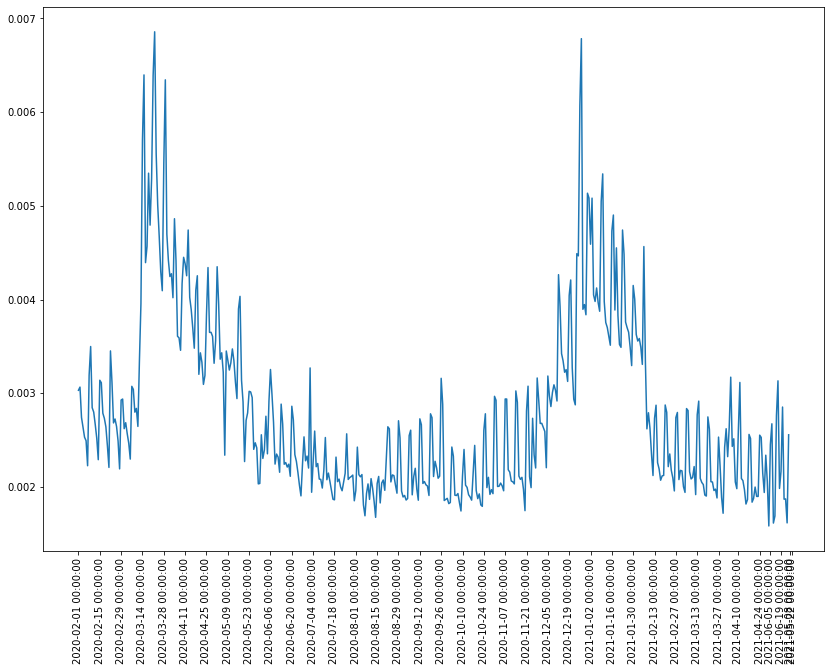

In [45]:
import matplotlib.pylab as plt
%matplotlib inline
dist = np.array(dist)
days = np.array(days)
#plt.hist(dist[dist < 1])
plt.figure(figsize=(14, 10))
plt.plot(days[dist < 1], dist[dist < 1])
plt.xticks(days[::14], rotation=90);

In [46]:
mun = pd.read_csv('../data/Municipality_cases_time_series.csv', sep=';')
mun.set_index('SampleDate', inplace=True)

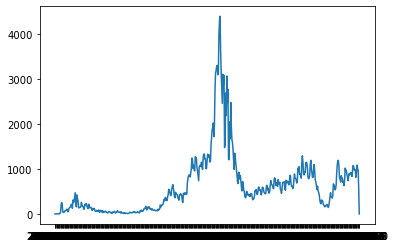

In [47]:
mun['total'] = mun.sum(axis=1)
plt.plot(mun.index, mun.total)
exclude_days = days[dist > 99]

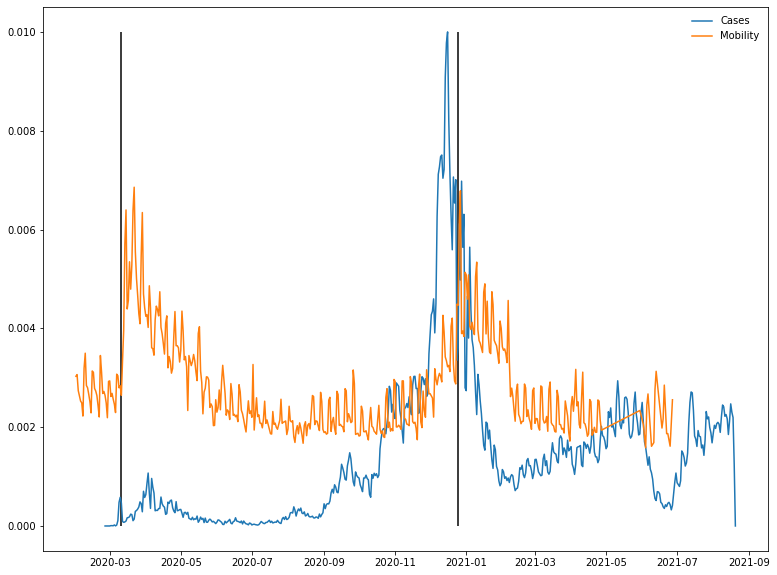

In [48]:
plt.figure(figsize=(13, 10))
plt.plot(pd.to_datetime(mun.index), mun.total / max(mun.total) / 1e2)
plt.plot(pd.to_datetime(days[dist < 99]), dist[dist < 99])
plt.legend(('Cases', 'Mobility'), loc='best', frameon=False)
doi = pd.to_datetime(['2020-03-11', '2020-12-25'])
plt.vlines(doi, 0, 0.01, color='k');

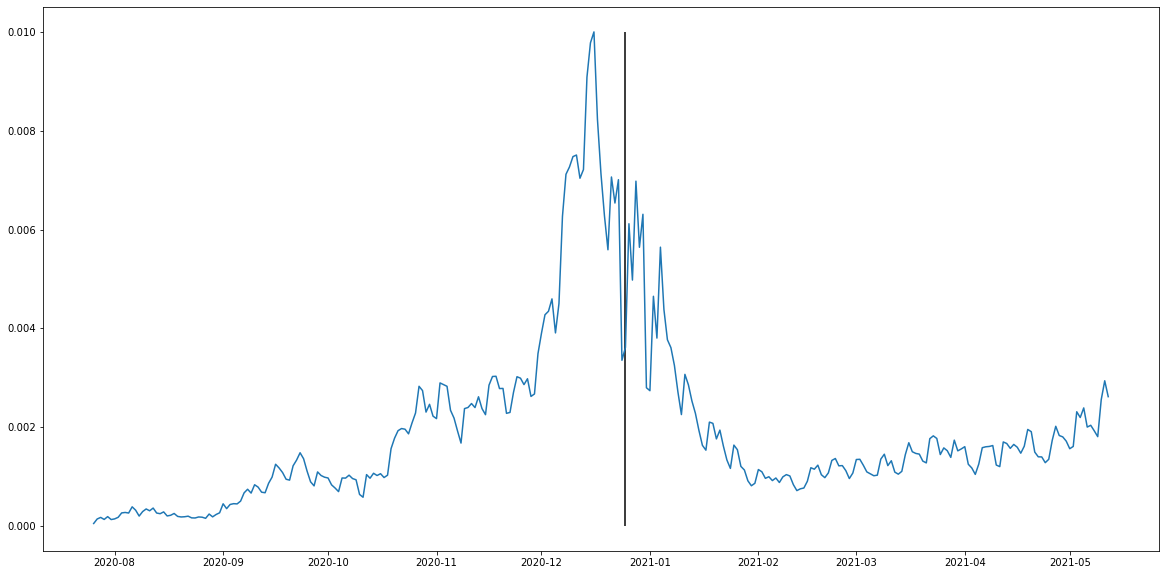

In [49]:
plt.figure(figsize=(20, 10))
plt.plot(pd.to_datetime(mun.index)[150:-100], mun.total[150:-100] / max(mun.total) / 1e2)
doi = pd.to_datetime(['2020-03-11', '2020-12-25'])
plt.vlines(doi[1], 0, 0.01, color='k');

In [52]:
adm = pd.read_csv('../data/Newly_admitted_over_time.csv', sep=';')

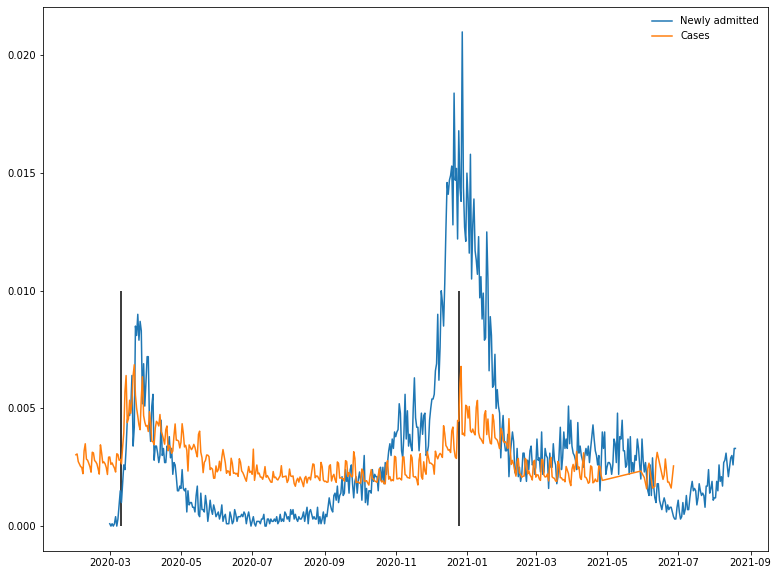

In [53]:
plt.figure(figsize=(13, 10))
plt.plot(pd.to_datetime(adm.Dato), adm.Total / 1e4)
plt.plot(pd.to_datetime(days[dist < 99]), dist[dist < 99])
plt.legend(('Newly admitted', 'Cases', 'Mobility'), loc='best', frameon=False)
plt.vlines(doi, 0, 0.01, color='k');

In [54]:
import datetime
doi_7d = doi + datetime.timedelta(days=7)

In [55]:
def get_average(time, series, lag, t0):
    time = pd.to_datetime(time)
    t1 = t0 + datetime.timedelta(days=lag)
    if lag > 0:
        idx = (time <= t1) & (time >= t0)
    else:
        idx = (time >= t1) & (time <= t0)
    return np.median(series[idx])

def get_perc(time, series, lags, t0):
    a = get_average(time, series, lags[0], t0)
    b = get_average(time, series, lags[1], t0)
    return (a-b)/a*100

print('Mobility(1):', get_perc(days, dist, (-7, 7), doi[0]))
print('Case(1):', get_perc(mun.index, mun.total, (7, 14), doi[0]))

print('Mobility(2):', get_perc(days, dist, (-7, 7), doi[1]))
print('Case(2):', get_perc(mun.index, mun.total, (7, 14), doi[1]))

Mobility(1): -64.59582610421081
Case(1): -27.73109243697479
Mobility(2): -30.51306074603219
Case(2): 17.45009658725048


In [136]:
import pandas as pd

In [137]:
r_nb = np.random.uniform(10,500,516)

In [138]:
df2 = pd.DataFrame({"date":day,"dist":dist, "length":r_nb, "bin":pd.cut(r_nb, bins=(10,50,200,500), labels=["short", "middle", "long"])})

In [120]:
df2.head()

,date,dist,length,bin
0,2021-06-30 00:00:00,0.003032,190.126041,middle
1,2021-06-30 00:00:00,0.003066,291.182622,long
2,2021-06-30 00:00:00,0.002742,196.128955,middle
3,2021-06-30 00:00:00,0.002637,346.206657,long
4,2021-06-30 00:00:00,0.002530,211.585970,long


In [125]:
mav = df2["dist"].rolling(window=7).mean()

In [128]:
df2["mav"] = mav

In [129]:
df2

,date,dist,length,bin,mav
0,2021-06-30 00:00:00,0.003032,190.126041,middle,NaN
1,2021-06-30 00:00:00,0.003066,291.182622,long,NaN
2,2021-06-30 00:00:00,0.002742,196.128955,middle,NaN
3,2021-06-30 00:00:00,0.002637,346.206657,long,NaN
4,2021-06-30 00:00:00,0.002530,211.585970,long,NaN
...,...,...,...,...,...
511,2021-06-30 00:00:00,inf,428.848885,long,NaN
512,2021-06-30 00:00:00,0.002557,77.061107,middle,NaN
513,2021-06-30 00:00:00,inf,492.334828,long,NaN
514,2021-06-30 00:00:00,inf,210.877658,long,NaN


bin
short     AxesSubplot(0.125,0.125;0.775x0.755)
middle    AxesSubplot(0.125,0.125;0.775x0.755)
long      AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

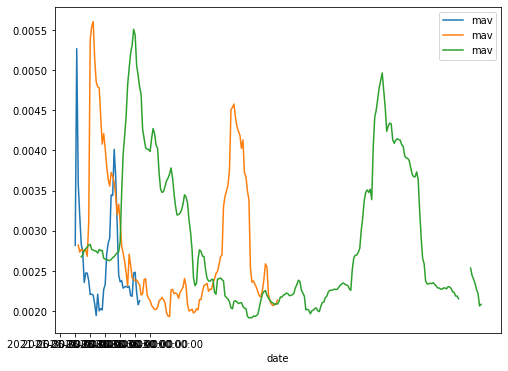

In [135]:
fig, ax = plt.subplots(figsize=(8,6))
df2.groupby("bin").plot("date","mav", ax=ax)

bin
short     AxesSubplot(0.125,0.125;0.775x0.755)
middle    AxesSubplot(0.125,0.125;0.775x0.755)
long      AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

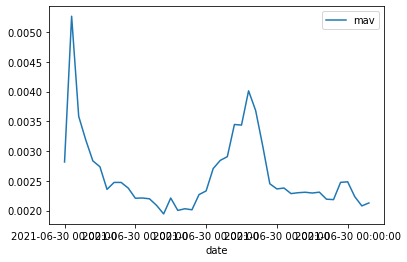

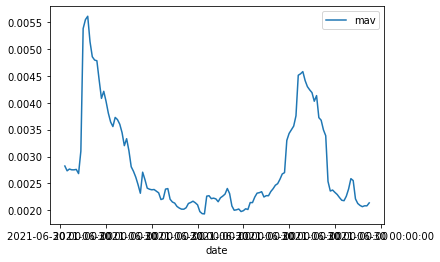

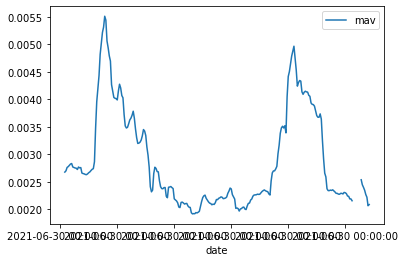

In [131]:
df2.groupby("bin").plot("date","mav")

<AxesSubplot:>

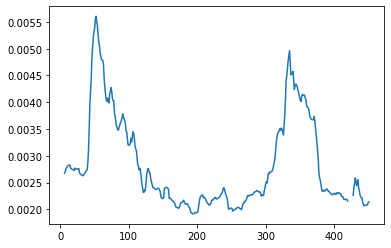

In [95]:
mav.plot()

In [101]:
base = df2["dist"][0]

In [107]:
diff = (base-mav)/base

<AxesSubplot:>

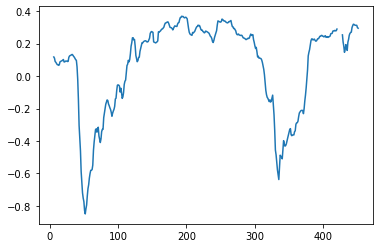

In [108]:
diff.plot()

In [171]:
zip1 = pd.read_csv("all_zipcodes.csv", index_col=0)

In [172]:
zip1.head()

,orig,dest,distance,duration
0,Aabenraa,Aabenraa,0.0,0.0
1,Aabenraa,Aalborg,257499.7,9894.1
2,Aabenraa,Aarhus,154397.0,6162.2
3,Aabenraa,Albertslund,278055.8,10909.7
4,Aabenraa,Allerød,313118.5,12584.5


In [184]:
df_merged = pd.merge(df,zip1, left_on=["src","dst"], right_on=["orig","dest"])

In [185]:
df_merged

,src,dst,day,value,inversed,orig,dest,distance,duration
0,Aabenraa,Aabenraa,2020-02-01 00:00:00,323162.099102,0.000015,Aabenraa,Aabenraa,0.0,0.0
1,Aabenraa,Aabenraa,2020-02-02 00:00:00,295328.638037,0.000017,Aabenraa,Aabenraa,0.0,0.0
2,Aabenraa,Aabenraa,2020-02-03 00:00:00,388974.404547,0.000013,Aabenraa,Aabenraa,0.0,0.0
3,Aabenraa,Aabenraa,2020-02-04 00:00:00,404667.087491,0.000012,Aabenraa,Aabenraa,0.0,0.0
4,Aabenraa,Aabenraa,2020-02-05 00:00:00,407815.830703,0.000012,Aabenraa,Aabenraa,0.0,0.0
...,...,...,...,...,...,...,...,...,...
4272991,Ærø,Ærø,2021-06-26 00:00:00,55759.730066,0.000090,Ærø,Ærø,0.0,0.0
4272992,Ærø,Ærø,2021-06-27 00:00:00,59839.710315,0.000084,Ærø,Ærø,0.0,0.0
4272993,Ærø,Ærø,2021-06-28 00:00:00,61501.924490,0.000081,Ærø,Ærø,0.0,0.0
4272994,Ærø,Ærø,2021-06-29 00:00:00,89457.344713,0.000056,Ærø,Ærø,0.0,0.0


In [186]:
df_merged.drop(columns=["orig", "dest"], inplace=True)

In [187]:
df_merged

,src,dst,day,value,inversed,distance,duration
0,Aabenraa,Aabenraa,2020-02-01 00:00:00,323162.099102,0.000015,0.0,0.0
1,Aabenraa,Aabenraa,2020-02-02 00:00:00,295328.638037,0.000017,0.0,0.0
2,Aabenraa,Aabenraa,2020-02-03 00:00:00,388974.404547,0.000013,0.0,0.0
3,Aabenraa,Aabenraa,2020-02-04 00:00:00,404667.087491,0.000012,0.0,0.0
4,Aabenraa,Aabenraa,2020-02-05 00:00:00,407815.830703,0.000012,0.0,0.0
...,...,...,...,...,...,...,...
4272991,Ærø,Ærø,2021-06-26 00:00:00,55759.730066,0.000090,0.0,0.0
4272992,Ærø,Ærø,2021-06-27 00:00:00,59839.710315,0.000084,0.0,0.0
4272993,Ærø,Ærø,2021-06-28 00:00:00,61501.924490,0.000081,0.0,0.0
4272994,Ærø,Ærø,2021-06-29 00:00:00,89457.344713,0.000056,0.0,0.0


<AxesSubplot:ylabel='Density'>

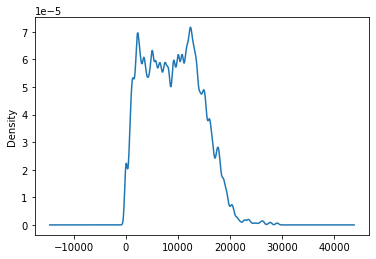

In [196]:
df_merged["duration"].plot(kind="kde")

In [202]:
df_merged["bin"] = pd.cut(df_merged["duration"],bins=(-1,900,3600,7200,50000),labels=("15 min", "1 hour", "2 hour", "long"))

In [203]:
df_merged

,src,dst,day,value,inversed,distance,duration,bin
0,Aabenraa,Aabenraa,2020-02-01 00:00:00,323162.099102,0.000015,0.0,0.0,15 min
1,Aabenraa,Aabenraa,2020-02-02 00:00:00,295328.638037,0.000017,0.0,0.0,15 min
2,Aabenraa,Aabenraa,2020-02-03 00:00:00,388974.404547,0.000013,0.0,0.0,15 min
3,Aabenraa,Aabenraa,2020-02-04 00:00:00,404667.087491,0.000012,0.0,0.0,15 min
4,Aabenraa,Aabenraa,2020-02-05 00:00:00,407815.830703,0.000012,0.0,0.0,15 min
...,...,...,...,...,...,...,...,...
4272991,Ærø,Ærø,2021-06-26 00:00:00,55759.730066,0.000090,0.0,0.0,15 min
4272992,Ærø,Ærø,2021-06-27 00:00:00,59839.710315,0.000084,0.0,0.0,15 min
4272993,Ærø,Ærø,2021-06-28 00:00:00,61501.924490,0.000081,0.0,0.0,15 min
4272994,Ærø,Ærø,2021-06-29 00:00:00,89457.344713,0.000056,0.0,0.0,15 min


In [222]:
group = df_merged.groupby(["day","bin"]).sum()

In [223]:
group

value  inversed      distance    duration
day                 bin                                                     
2020-02-01 00:00:00 15 min  2.838452e+07  0.322159  1.079235e+06     82819.4
                    1 hour  4.730321e+06       inf  5.731081e+07   3101592.1
                    2 hour  6.673066e+05       inf  1.966622e+08   9195446.9
                    long    1.037417e+05       inf  1.462402e+09  63055279.8
2020-02-02 00:00:00 15 min  2.609722e+07  0.339644  1.079235e+06     82819.4
...                                  ...       ...           ...         ...
2021-06-29 00:00:00 long    2.200309e+04       inf  1.462402e+09  63055279.8
2021-06-30 00:00:00 15 min  4.125793e+07       inf  1.079235e+06     82819.4
                    1 hour  8.281415e+06       inf  5.731081e+07   3101592.1
                    2 hour  7.555766e+05       inf  1.966622e+08   9195446.9
                    long    1.512491e+04       inf  1.462402e+09  63055279.8

[2064 rows x 4 columns]

In [224]:
group = group.reset_index()

In [225]:
group

,day,bin,value,inversed,distance,duration
0,2020-02-01 00:00:00,15 min,2.838452e+07,0.322159,1.079235e+06,82819.4
1,2020-02-01 00:00:00,1 hour,4.730321e+06,inf,5.731081e+07,3101592.1
2,2020-02-01 00:00:00,2 hour,6.673066e+05,inf,1.966622e+08,9195446.9
3,2020-02-01 00:00:00,long,1.037417e+05,inf,1.462402e+09,63055279.8
4,2020-02-02 00:00:00,15 min,2.609722e+07,0.339644,1.079235e+06,82819.4
...,...,...,...,...,...,...
2059,2021-06-29 00:00:00,long,2.200309e+04,inf,1.462402e+09,63055279.8
2060,2021-06-30 00:00:00,15 min,4.125793e+07,inf,1.079235e+06,82819.4
2061,2021-06-30 00:00:00,1 hour,8.281415e+06,inf,5.731081e+07,3101592.1
2062,2021-06-30 00:00:00,2 hour,7.555766e+05,inf,1.966622e+08,9195446.9


bin
15 min    AxesSubplot(0.125,0.125;0.775x0.755)
1 hour    AxesSubplot(0.125,0.125;0.775x0.755)
2 hour    AxesSubplot(0.125,0.125;0.775x0.755)
long      AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

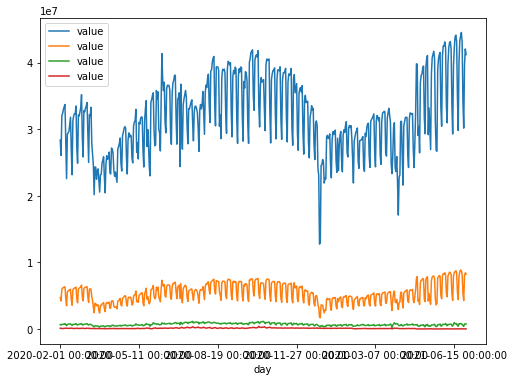

In [226]:
fig, ax = plt.subplots(figsize=(8,6))
group.groupby("bin").plot("day","value", ax=ax)

In [241]:
group.set_index("day", inplace=True)

In [242]:
group

,bin,value,inversed,distance,duration,ma_duration
day,,,,,,
2020-02-01 00:00:00,15 min,2.838452e+07,0.322159,1.079235e+06,82819.4,NaN
2020-02-01 00:00:00,1 hour,4.730321e+06,inf,5.731081e+07,3101592.1,NaN
2020-02-01 00:00:00,2 hour,6.673066e+05,inf,1.966622e+08,9195446.9,NaN
2020-02-01 00:00:00,long,1.037417e+05,inf,1.462402e+09,63055279.8,NaN
2020-02-02 00:00:00,15 min,2.609722e+07,0.339644,1.079235e+06,82819.4,NaN
...,...,...,...,...,...,...
2021-06-29 00:00:00,long,2.200309e+04,inf,1.462402e+09,63055279.8,63055279.8
2021-06-30 00:00:00,15 min,4.125793e+07,inf,1.079235e+06,82819.4,63055279.8
2021-06-30 00:00:00,1 hour,8.281415e+06,inf,5.731081e+07,3101592.1,63055279.8


In [243]:
magroup = group.groupby('bin').rolling(window=7).mean()

In [245]:
magroup = magroup.reset_index()

In [246]:
magroup

,bin,day,value,inversed,distance,duration,ma_duration
0,15 min,2020-02-01 00:00:00,NaN,NaN,NaN,NaN,NaN
1,15 min,2020-02-02 00:00:00,NaN,NaN,NaN,NaN,NaN
2,15 min,2020-02-03 00:00:00,NaN,NaN,NaN,NaN,NaN
3,15 min,2020-02-04 00:00:00,NaN,NaN,NaN,NaN,NaN
4,15 min,2020-02-05 00:00:00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2059,long,2021-06-26 00:00:00,17881.473700,NaN,1.462402e+09,63055279.8,63055279.8
2060,long,2021-06-27 00:00:00,20514.816615,NaN,1.462402e+09,63055279.8,63055279.8
2061,long,2021-06-28 00:00:00,20958.098018,NaN,1.462402e+09,63055279.8,63055279.8
2062,long,2021-06-29 00:00:00,22681.038444,NaN,1.462402e+09,63055279.8,63055279.8


In [247]:
magroup.head(10)

,bin,day,value,inversed,distance,duration,ma_duration
0,15 min,2020-02-01 00:00:00,NaN,NaN,NaN,NaN,NaN
1,15 min,2020-02-02 00:00:00,NaN,NaN,NaN,NaN,NaN
2,15 min,2020-02-03 00:00:00,NaN,NaN,NaN,NaN,NaN
3,15 min,2020-02-04 00:00:00,NaN,NaN,NaN,NaN,NaN
4,15 min,2020-02-05 00:00:00,NaN,NaN,NaN,NaN,NaN
5,15 min,2020-02-06 00:00:00,NaN,NaN,NaN,NaN,NaN
6,15 min,2020-02-07 00:00:00,3.130465e+07,0.227521,1079234.7,82819.4,NaN
7,15 min,2020-02-08 00:00:00,3.125521e+07,0.224780,1079234.7,82819.4,NaN
8,15 min,2020-02-09 00:00:00,3.075538e+07,0.228011,1079234.7,82819.4,82819.4
9,15 min,2020-02-10 00:00:00,3.035359e+07,0.229450,1079234.7,82819.4,82819.4


<AxesSubplot:>

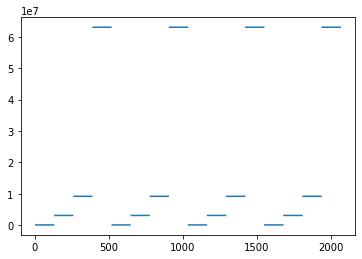

In [248]:
magroup["ma_duration"].plot()

In [251]:
group

,bin,value,inversed,distance,duration,ma_duration
day,,,,,,
2020-02-01 00:00:00,15 min,2.838452e+07,0.322159,1.079235e+06,82819.4,NaN
2020-02-01 00:00:00,1 hour,4.730321e+06,inf,5.731081e+07,3101592.1,NaN
2020-02-01 00:00:00,2 hour,6.673066e+05,inf,1.966622e+08,9195446.9,NaN
2020-02-01 00:00:00,long,1.037417e+05,inf,1.462402e+09,63055279.8,NaN
2020-02-02 00:00:00,15 min,2.609722e+07,0.339644,1.079235e+06,82819.4,NaN
...,...,...,...,...,...,...
2021-06-29 00:00:00,long,2.200309e+04,inf,1.462402e+09,63055279.8,63055279.8
2021-06-30 00:00:00,15 min,4.125793e+07,inf,1.079235e+06,82819.4,63055279.8
2021-06-30 00:00:00,1 hour,8.281415e+06,inf,5.731081e+07,3101592.1,63055279.8


In [252]:
group = group.reset_index()

In [253]:
group

,day,bin,value,inversed,distance,duration,ma_duration
0,2020-02-01 00:00:00,15 min,2.838452e+07,0.322159,1.079235e+06,82819.4,NaN
1,2020-02-01 00:00:00,1 hour,4.730321e+06,inf,5.731081e+07,3101592.1,NaN
2,2020-02-01 00:00:00,2 hour,6.673066e+05,inf,1.966622e+08,9195446.9,NaN
3,2020-02-01 00:00:00,long,1.037417e+05,inf,1.462402e+09,63055279.8,NaN
4,2020-02-02 00:00:00,15 min,2.609722e+07,0.339644,1.079235e+06,82819.4,NaN
...,...,...,...,...,...,...,...
2059,2021-06-29 00:00:00,long,2.200309e+04,inf,1.462402e+09,63055279.8,63055279.8
2060,2021-06-30 00:00:00,15 min,4.125793e+07,inf,1.079235e+06,82819.4,63055279.8
2061,2021-06-30 00:00:00,1 hour,8.281415e+06,inf,5.731081e+07,3101592.1,63055279.8
2062,2021-06-30 00:00:00,2 hour,7.555766e+05,inf,1.966622e+08,9195446.9,63055279.8


In [255]:
group

,day,bin,value,inversed,distance,duration,ma_duration
0,2020-02-01 00:00:00,15 min,2.838452e+07,0.322159,1.079235e+06,82819.4,NaN
1,2020-02-01 00:00:00,1 hour,4.730321e+06,inf,5.731081e+07,3101592.1,NaN
2,2020-02-01 00:00:00,2 hour,6.673066e+05,inf,1.966622e+08,9195446.9,NaN
3,2020-02-01 00:00:00,long,1.037417e+05,inf,1.462402e+09,63055279.8,NaN
4,2020-02-02 00:00:00,15 min,2.609722e+07,0.339644,1.079235e+06,82819.4,NaN
...,...,...,...,...,...,...,...
2059,2021-06-29 00:00:00,long,2.200309e+04,inf,1.462402e+09,63055279.8,63055279.8
2060,2021-06-30 00:00:00,15 min,4.125793e+07,inf,1.079235e+06,82819.4,63055279.8
2061,2021-06-30 00:00:00,1 hour,8.281415e+06,inf,5.731081e+07,3101592.1,63055279.8
2062,2021-06-30 00:00:00,2 hour,7.555766e+05,inf,1.966622e+08,9195446.9,63055279.8


In [257]:
group.loc[group["day"]=="2020-02-07 00:00:00",["bin","ma_duration"]]

,bin,ma_duration
24,15 min,82819.4
25,1 hour,82819.4
26,2 hour,82819.4
27,long,82819.4


In [259]:
group.groupby("bin").head(10)

,day,bin,value,inversed,distance,duration,ma_duration
0,2020-02-01 00:00:00,15 min,2.838452e+07,0.322159,1.079235e+06,82819.4,NaN
1,2020-02-01 00:00:00,1 hour,4.730321e+06,inf,5.731081e+07,3101592.1,NaN
2,2020-02-01 00:00:00,2 hour,6.673066e+05,inf,1.966622e+08,9195446.9,NaN
3,2020-02-01 00:00:00,long,1.037417e+05,inf,1.462402e+09,63055279.8,NaN
4,2020-02-02 00:00:00,15 min,2.609722e+07,0.339644,1.079235e+06,82819.4,NaN
5,2020-02-02 00:00:00,1 hour,4.197024e+06,inf,5.731081e+07,3101592.1,NaN
6,2020-02-02 00:00:00,2 hour,5.893730e+05,inf,1.966622e+08,9195446.9,82819.4
7,2020-02-02 00:00:00,long,1.177604e+05,inf,1.462402e+09,63055279.8,82819.4
8,2020-02-03 00:00:00,15 min,3.207252e+07,0.193820,1.079235e+06,82819.4,82819.4
9,2020-02-03 00:00:00,1 hour,5.983151e+06,inf,5.731081e+07,3101592.1,82819.4


In [216]:
group.groupby("bin").groups

{'15 min': [('2020-02-01 00:00:00', '15 min'), ('2020-02-02 00:00:00', '15 min'), ('2020-02-03 00:00:00', '15 min'), ('2020-02-04 00:00:00', '15 min'), ('2020-02-05 00:00:00', '15 min'), ('2020-02-06 00:00:00', '15 min'), ('2020-02-07 00:00:00', '15 min'), ('2020-02-08 00:00:00', '15 min'), ('2020-02-09 00:00:00', '15 min'), ('2020-02-10 00:00:00', '15 min'), ('2020-02-11 00:00:00', '15 min'), ('2020-02-12 00:00:00', '15 min'), ('2020-02-13 00:00:00', '15 min'), ('2020-02-14 00:00:00', '15 min'), ('2020-02-15 00:00:00', '15 min'), ('2020-02-16 00:00:00', '15 min'), ('2020-02-17 00:00:00', '15 min'), ('2020-02-18 00:00:00', '15 min'), ('2020-02-19 00:00:00', '15 min'), ('2020-02-20 00:00:00', '15 min'), ('2020-02-21 00:00:00', '15 min'), ('2020-02-22 00:00:00', '15 min'), ('2020-02-23 00:00:00', '15 min'), ('2020-02-24 00:00:00', '15 min'), ('2020-02-25 00:00:00', '15 min'), ('2020-02-26 00:00:00', '15 min'), ('2020-02-27 00:00:00', '15 min'), ('2020-02-28 00:00:00', '15 min'), ('2020-0

In [176]:
df_dropped

In [144]:
df

,src,dst,day,value,inversed
0,Aabenraa,Aabenraa,2020-02-01 00:00:00,323162.099102,0.000015
1,Aabenraa,Aalborg,2020-02-01 00:00:00,405.268442,0.012338
2,Aabenraa,Albertslund,2020-02-01 00:00:00,0.000000,inf
3,Aabenraa,Allerød,2020-02-01 00:00:00,0.000000,inf
4,Aabenraa,Assens,2020-02-01 00:00:00,690.133217,0.007245
...,...,...,...,...,...
4955659,Ærø,Vesthimmerland,2021-06-30 00:00:00,0.000000,inf
4955660,Ærø,Viborg,2021-06-30 00:00:00,0.000000,inf
4955661,Ærø,Vordingborg,2021-06-30 00:00:00,0.000000,inf
4955662,Ærø,Århus,2021-06-30 00:00:00,0.000000,inf
